# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score




## 2. Wczytuje  i sprawdzam typ danych

In [22]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_M.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [23]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.0,0.747599,0.0,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.0,20.562431,0.0,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,7.748430,3.874215,2.905661,1.937107,0.968554,1.682378e+03,0.000000,6.586165e+01,0.000000,0.968554,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX
849,40.077878,17.534072,10.854425,1.669912,12.524337,1.329250e+03,3.339823,9.935974e+01,2.504867,2.504867,...,0.000000,0.000000,0.0,0.834956,0.0,0.000000,0.000000,0.0,0.000000,MX
850,20.868834,16.475395,15.377035,1.098360,8.786877,1.889179e+03,1.098360,7.468846e+01,4.393439,4.393439,...,0.000000,0.000000,0.0,0.000000,0.0,1.098360,0.000000,0.0,0.000000,MX
851,4.708151,12.947416,14.124453,2.354076,9.416302,8.380509e+02,4.708151,2.683646e+02,0.000000,7.062227,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX


In [24]:
train_df=train_df.loc[(train_df['scale']!='MX')]

In [25]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.000000,0.747599,0.000000,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.000000,20.562431,0.000000,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,10.162692,2.540673,5.081346,2.540673,0.000000,3.506976e+03,10.162692,2.345888e+02,2.540673,1.693782,...,0.000000,1.693782,0.000000,0.000000,0.000000,1.693782,0.846891,0.0,0.000000,M1
706,8.657314,4.328657,7.791583,2.597194,0.000000,1.103808e+03,6.925851,4.068938e+01,9.523046,5.194389,...,0.000000,0.000000,0.865731,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M1
707,13.471784,17.145907,25.718861,2.449415,3.674123,2.878063e+02,9.797661,9.185307e+01,11.022369,34.291814,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.449415,1.224708,0.0,3.674123,M1
708,12.814782,34.706702,25.629565,2.135797,11.212935,1.056152e+03,4.271594,1.105275e+02,24.561666,17.620326,...,0.000000,0.533949,0.533949,0.000000,0.533949,0.000000,0.533949,0.0,0.533949,M1


In [26]:
train_df['scale'].value_counts()

M0    602
M1    108
Name: scale, dtype: int64

In [27]:
y=train_df['scale']
del train_df['scale']

In [28]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000199592.1,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.000000,0.747599,0.000000,0.747599,0.000000,0.747599,0.000000,0.0,0.000000
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.000000,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,31.871768,0.000000,953.068666,0.000000,20.562431,0.000000,269.367843,64.771657,0.0,123.374585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,10.162692,2.540673,5.081346,2.540673,0.000000,3.506976e+03,10.162692,2.345888e+02,2.540673,1.693782,...,0.000000,0.000000,1.693782,0.000000,0.000000,0.000000,1.693782,0.846891,0.0,0.000000
706,8.657314,4.328657,7.791583,2.597194,0.000000,1.103808e+03,6.925851,4.068938e+01,9.523046,5.194389,...,0.000000,0.000000,0.000000,0.865731,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
707,13.471784,17.145907,25.718861,2.449415,3.674123,2.878063e+02,9.797661,9.185307e+01,11.022369,34.291814,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.449415,1.224708,0.0,3.674123
708,12.814782,34.706702,25.629565,2.135797,11.212935,1.056152e+03,4.271594,1.105275e+02,24.561666,17.620326,...,2.135797,0.000000,0.533949,0.533949,0.000000,0.533949,0.000000,0.533949,0.0,0.533949


In [29]:
ftwo_scorer = make_scorer(fbeta_score, beta=1,labels=['M0','M1'],pos_label='M1',greater_is_better=True)

In [30]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

## 7.2 Losowe lasy drzew decyzyjnych

## 7.3 Hiperparametry Wszystkie

### 7.3.1 Hiperparametry Wszystkie part1

In [38]:
param_grid = {
    'criterion':['gini', 'entropy'], #
    'min_samples_split':range(2,15,10), #
    'min_samples_leaf': range(1,15,10),  #   
    'max_leaf_nodes':range(2,15,10),  #
    'min_impurity_decrease':[0,0.1], #
    'max_depth':list(range(2,13,10)), #
    'min_weight_fraction_leaf':[0,0.1],
    'max_features':['auto','sqrt','log2'],
    'n_estimators':[100,500] #
}

In [39]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(2, 15, 10),
                         'min_impurity_decrease': [0, 0.1],
                         'min_samples_leaf': range(1, 15, 10),
                         'min_samples_split': range(2, 15, 10),
                         'min_weight_fraction_leaf': [0, 0.1],
                         'n_estimators': [100, 500]},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [40]:
grid_search_2.best_estimator_

RandomForestClassifier(max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, random_state=42)

In [41]:
grid_search_2.best_score_

0.0

In [42]:
grid_search_2.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

### 7.3.2 Hiperparametry Wszystkie part2

In [43]:
param_grid = {
    'criterion':['gini'], #
    'min_samples_split':range(2,5,1), #
    'min_samples_leaf': range(1,5,1),  #   
    'max_leaf_nodes':range(2,7,1),  
    'min_impurity_decrease':[0], 
    'max_depth':list(range(2, 5,1)), 
    'min_weight_fraction_leaf':[0],
    'max_features':['auto'],
    'n_estimators':[100] 
}

In [44]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 4,verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(2, 7),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [100]},
             scoring=make_scorer(fbeta_score, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [45]:
grid_search_2.best_estimator_

RandomForestClassifier(max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, random_state=42)

In [46]:
grid_search_2.best_score_

0.0

In [47]:
grid_search_2.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 100}

## 7.4 Cross valiadacja losowych lasów drzew decyzyjnych

### 7.4.1 Cross valiadacja losowych lasy drzew decyzyjnych Wszystkie

In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    RF_1 = RandomForestClassifier(criterion='gini',
                                 max_depth= 2,
 max_features= 'auto',
 max_leaf_nodes= 2,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0,
 n_estimators= 100,
                                 random_state=42)
    RF_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=RF_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['M0','M1'],pos_label='M1')
    wart_1.append(blad)
    licznik+=1
    

    

In [12]:
wart_1

[0.0, 0.0, 0.0, 0.0, 0.0]

In [13]:
sum(wart_1)/len(wart_1)

0.0

## 7.5 Zapisuje predykcje losowych lasów drzew decyzyjnych Wszystkie

In [14]:
dane_do_zapisu_1.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_M_Las_drzew_decyzyjnych.csv')

In [2]:
dane_do_zapisu_1=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\M\\Klasa_M_Las_drzew_decyzyjnych.csv')

In [4]:
dane_do_zapisu_2=dane_do_zapisu_1

In [5]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [6]:
cf_matrix

array([[602,   0],
       [108,   0]], dtype=int64)

In [7]:
import seaborn as sns

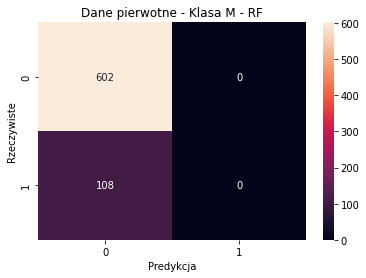

In [8]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa M - RF')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.000
Precision: 0.000
F1score: 0.000


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
